<b style="color:Green;font-size:32px;">Technocolabs Machine Learning Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">Project 6 - Cross-Validation Grid Search with Random Forest</b><br>
<b style="font-size:19px;color:BlueViolet;">Submitted by Umme Athiya</b><br>
<b style="font-size:17px;">Description of the task:-</b><br>
<ul style="font-size:15px;line-height:10px;"><li><b>Write list comprehensions in Python.</b></li><br>
    <li><b>Train a decision tree model in scikit-learn</b></li><br>
<li><b>Use Graphviz to visualize a trained decision tree model</b></li><br>
<li><b>Formulate the cost functions used to split nodes in a decision tree</b></li><br>
<li><b>Perform a hyperparameter grid search using cross-validation with scikit-learn functions</b></li><br>
<li><b>Train a random forest model in scikit-learn</b></li><br>
    <b><li>GitHub Repository Link:- <a>https://github.com/UMMEATHIYA/Technocolabs-ML-Internship</a></li></b>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**Run the following 3 cells to create a list of features, create a train/test split, and instantiate a random forest classifier.**

In [3]:
features_response = df.columns.tolist()
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,
    df['default payment next month'].values,
    test_size=0.3, random_state=42
)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

**Create a dictionary representing the grid for the max_depth and n_estimators hyperparameters that will be searched. Include depths of 3, 6, 9, and 12, and 10, 50, 100, and 200 trees.**



In [6]:
params = {
    'max_depth':[3,6,9,12],
    'n_estimators': [10,50,100,200]
}

**Instantiate a GridSearchCV object using the same options that we have previously in this course, but with the dictionary of hyperparameters created above. Set verbose=2 to see the output for each fit performed.**



In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
grid_cv = GridSearchCV(rf, param_grid = params, scoring = 'roc_auc', n_jobs = None, iid = False, refit = True, cv = 4, verbose = 2, pre_dispatch = None, error_score = np.nan, return_train_score = True)

**Fit the GridSearchCV object on the training data.**

In [9]:
grid_cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=10 ....................................
[CV] ..................... max_depth=3, n_estimators=10, total=   0.2s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.8s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=50 ....................................
[CV] ..................... max_depth=3, n_estimators=50, total=   0.9s
[CV] max_depth=3, n_estimators=100 ...................................
[CV] .

[CV] ................... max_depth=12, n_estimators=100, total=   4.6s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.0s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.9s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   8.9s
[CV] max_depth=12, n_estimators=200 ..................................
[CV] ................... max_depth=12, n_estimators=200, total=   9.0s


[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:  3.2min finished
C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'max_depth': [3, 6, 9, 12],
                         'n_estimators': [10, 50, 100, 200]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=2)

**Put the results of the grid search in a pandas DataFrame.**



In [10]:
grid_cv_results_df = pd.DataFrame(grid_cv.cv_results_)
grid_cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.180760,0.009039,0.011001,7.070555e-04,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.766966,0.762926,0.748736,0.754514,0.758286,0.007112,15,0.764740,0.763405,0.770208,0.764395,0.765687,0.002656
1,0.839798,0.025461,0.034502,4.999638e-04,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.770503,0.769068,0.758801,0.759676,0.764512,0.005307,12,0.771093,0.770357,0.776392,0.772092,0.772484,0.002339
2,1.658845,0.068562,0.080255,1.859372e-02,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.770085,0.767349,0.757152,0.760788,0.763844,0.005132,13,0.770556,0.769159,0.775665,0.772629,0.772002,0.002449
3,3.199183,0.057113,0.129257,2.947566e-03,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.769621,0.767427,0.756292,0.761927,0.763817,0.005170,14,0.771118,0.769364,0.775538,0.772021,0.772010,0.002250
4,0.272016,0.007649,0.012001,1.032383e-07,6,10,"{'max_depth': 6, 'n_estimators': 10}",0.777730,0.779818,0.757915,0.767195,0.770664,0.008779,10,0.799923,0.800188,0.803135,0.801030,0.801069,0.001261
5,1.263822,0.008074,0.041002,1.032383e-07,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.782219,0.781816,0.763385,0.770548,0.774492,0.007942,7,0.807000,0.807316,0.812598,0.809402,0.809079,0.002231
6,2.481392,0.014061,0.077004,7.070555e-04,6,100,"{'max_depth': 6, 'n_estimators': 100}",0.782162,0.781262,0.763201,0.771992,0.774654,0.007719,6,0.808209,0.808669,0.812647,0.811153,0.810170,0.001817
7,4.983285,0.028259,0.148508,8.660315e-04,6,200,"{'max_depth': 6, 'n_estimators': 200}",0.781611,0.781830,0.763091,0.772186,0.774680,0.007741,5,0.808892,0.808715,0.812577,0.811312,0.810374,0.001634
8,0.359770,0.011541,0.014001,1.192093e-07,9,10,"{'max_depth': 9, 'n_estimators': 10}",0.778596,0.775065,0.759654,0.763635,0.769238,0.007822,11,0.863130,0.862514,0.857386,0.857908,0.860235,0.002603
9,1.750850,0.036583,0.050253,8.293118e-04,9,50,"{'max_depth': 9, 'n_estimators': 50}",0.784597,0.785448,0.766104,0.771711,0.776965,0.008303,3,0.874370,0.879126,0.874284,0.875852,0.875908,0.001960


In [11]:
grid_cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

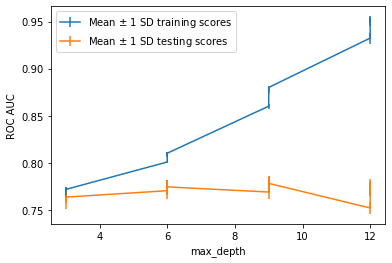

In [12]:
ax = plt.axes()
ax.errorbar(grid_cv_results_df['param_max_depth'],
           grid_cv_results_df['mean_train_score'],
           yerr= grid_cv_results_df['std_train_score'],
           label='Mean $\pm$ 1 SD training scores')

ax.errorbar(grid_cv_results_df['param_max_depth'],
           grid_cv_results_df['mean_test_score'],
           yerr= grid_cv_results_df['std_test_score'],
           label='Mean $\pm$ 1 SD testing scores')

ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.show()

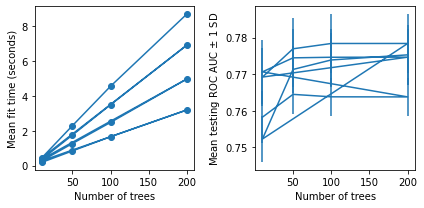

In [13]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6,3))
axs[0].plot(grid_cv_results_df['param_n_estimators'],
            grid_cv_results_df['mean_fit_time'],
            '-o')

axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')

axs[1].errorbar(grid_cv_results_df['param_n_estimators'],
               grid_cv_results_df['mean_test_score'],
               yerr = grid_cv_results_df['std_test_score'])

axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD')
plt.tight_layout()

**Find the best hyperparameters from the cross-validation.**

In [14]:
grid_cv.best_params_

{'max_depth': 9, 'n_estimators': 200}

**Create a pcolormesh visualization of the mean testing score for each combination of hyperparameters.**



In [15]:
x_coordi, y_coordi = np.meshgrid(range(5), range(5))
z_coordi = grid_cv_results_df.mean_test_score.values.reshape(4,4)
print(x_coordi)
print(y_coordi)
print(z_coordi)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0.75828567 0.76451204 0.76384357 0.7638168 ]
 [0.77066446 0.77449181 0.7746541  0.77467968]
 [0.76923768 0.77696506 0.77841582 0.77842253]
 [0.75231275 0.77132379 0.77391439 0.77531128]]


In [16]:
color_map = plt.cm.jet

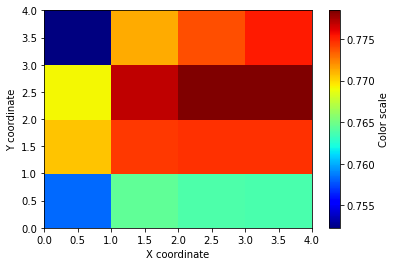

In [17]:
ax = plt.axes()

pcolor_ex = ax.pcolormesh(x_coordi, y_coordi, z_coordi, cmap = color_map)

plt.colorbar(pcolor_ex, label = 'Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')
plt.show()

**Conclude which set of hyperparameters to use.**



In [18]:
feature_importance_df = pd.DataFrame({
    'Feature Name': features_response[:-1],
    'Importance': grid_cv.best_estimator_.feature_importances_
})


In [19]:
feature_importance_df.sort_values("Importance", ascending = False)

,Feature Name,Importance
4,PAY_1,0.421195
11,PAY_AMT1,0.059171
0,LIMIT_BAL,0.057379
12,PAY_AMT2,0.051641
6,BILL_AMT2,0.044974
13,PAY_AMT3,0.042998
5,BILL_AMT1,0.040915
7,BILL_AMT3,0.038849
8,BILL_AMT4,0.035230
10,BILL_AMT6,0.034803


Global minima (-20-15) at: 0.013750000000006354
Local minimum (5-15) at: 12.078382194916786


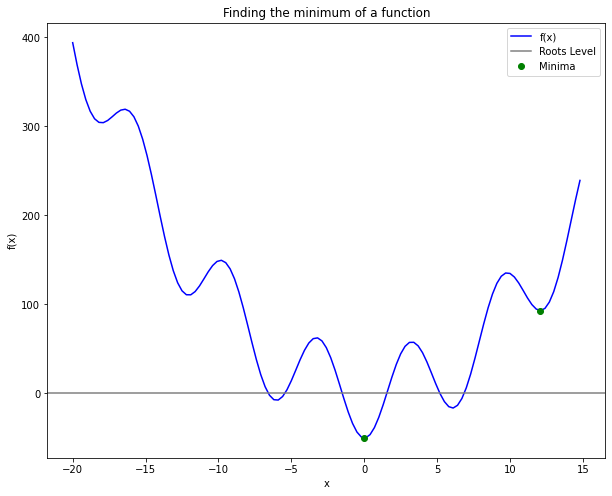

In [20]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import optimize

# Creating a function to examine
x = np.arange(-20, 15, 0.3)
def f(x):
    return x**2 - (5*x)/7 - 50*np.cos(x)

# Global optimization
grid = (-20, 15, 0.3)
xmin_global = optimize.brute(f, (grid, ))
print("Global minima (-20-15) at: {}".format(float(xmin_global)))

# Constrained optimization
xmin_local = optimize.fminbound(f, 5, 15)
print("Local minimum (5-15) at: {}".format(xmin_local))

# Plotting the function
fig = plt.figure(figsize=(10, 8))
plt.plot(x, f(x), 'b', label="f(x)")

# Plotting horizontal line where possible roots can be found 
plt.axhline(0, color='gray', label="Roots Level")

# Plotting the function minima
xmins = np.array([xmin_global[0], xmin_local])
plt.plot(xmins, f(xmins), 'go', label="Minima")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Finding the minimum of a function")
plt.legend(loc='best')
plt.show()